In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier



# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor





# Modelling Helpers :
from sklearn.preprocessing import Normalizer,scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

print("Setup complete...")
asd = pd.read_csv("/content/drive/MyDrive/Toddler Autism dataset July 2018.csv")
print("Dataset loaded...")

Setup complete...
Dataset loaded...


In [ ]:
asd

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


In [ ]:
asd.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
asd.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


In [ ]:
asd.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
asd.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [ ]:
asd.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object

<Axes: xlabel='Class/ASD Traits ', ylabel='count'>

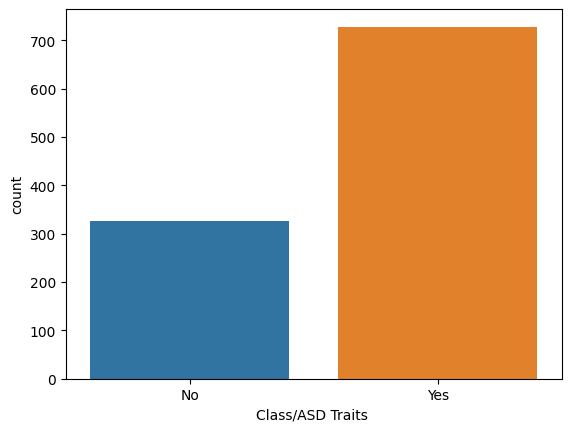

In [ ]:
sns.countplot(x='Class/ASD Traits ' , data=asd)

<Axes: >

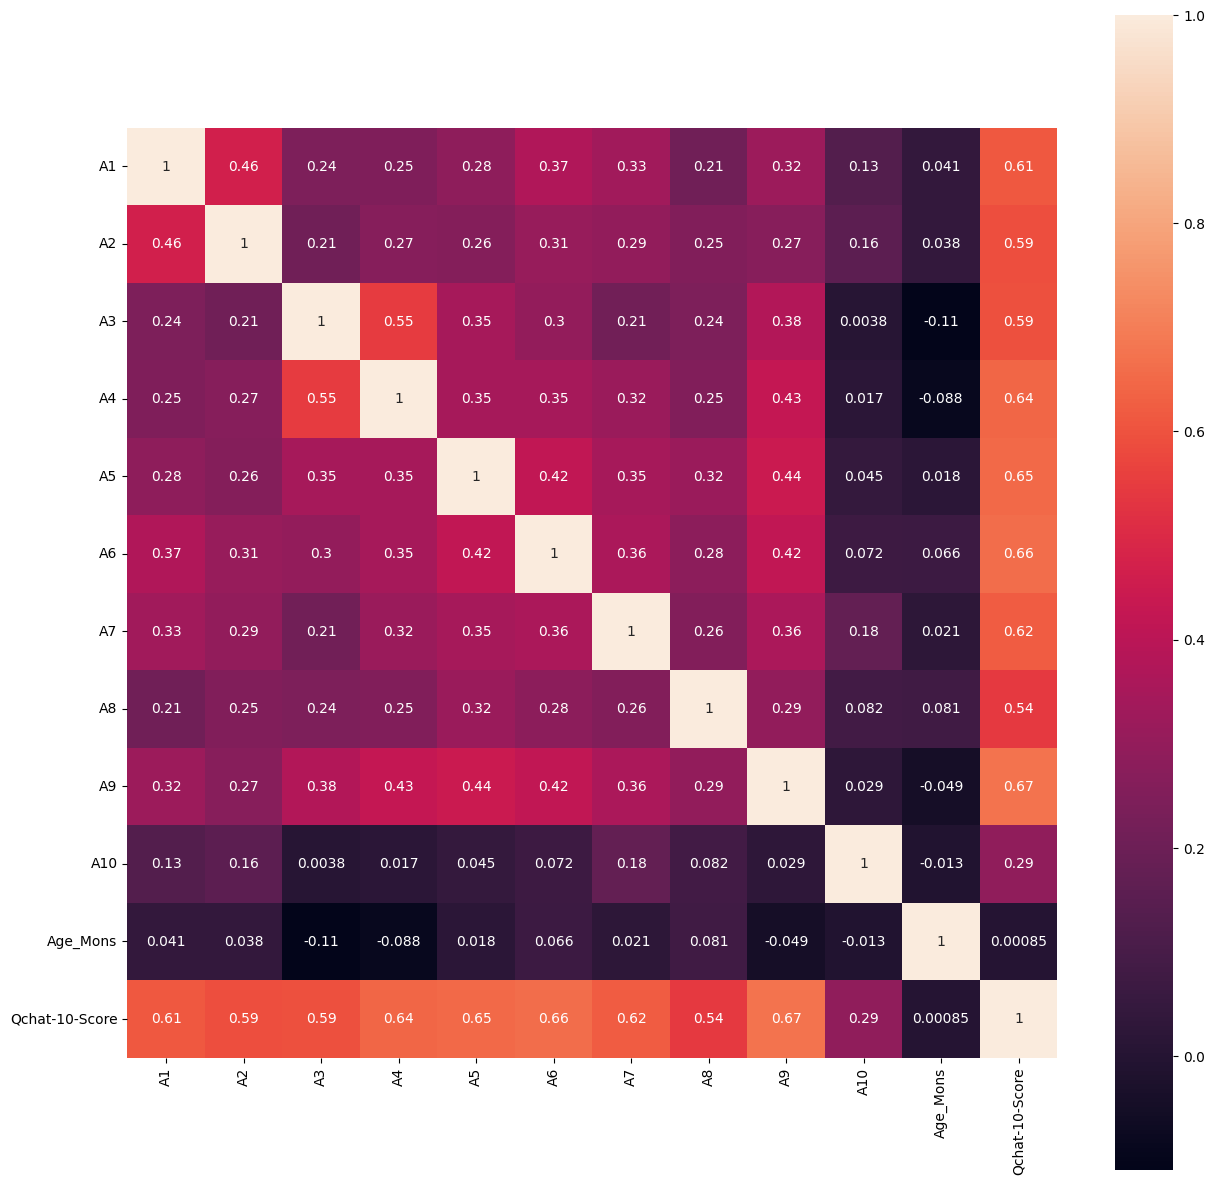

In [ ]:
corr = asd.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'middle eastern'),
  Text(1, 0, 'White European'),
  Text(2, 0, 'Hispanic'),
  Text(3, 0, 'black'),
  Text(4, 0, 'asian'),
  Text(5, 0, 'south asian'),
  Text(6, 0, 'Native Indian'),
  Text(7, 0, 'Others'),
  Text(8, 0, 'Latino'),
  Text(9, 0, 'mixed'),
  Text(10, 0, 'Pacifica')])

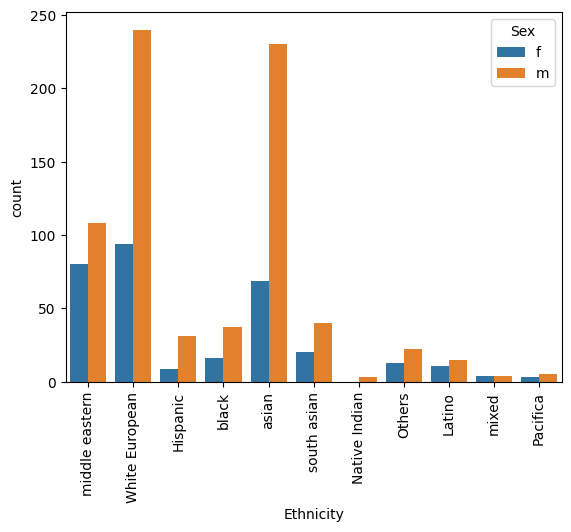

In [ ]:
sns.countplot(x='Ethnicity',hue='Sex',data=asd)
plt.xticks(rotation=90)

<Axes: xlabel='Ethnicity', ylabel='count'>

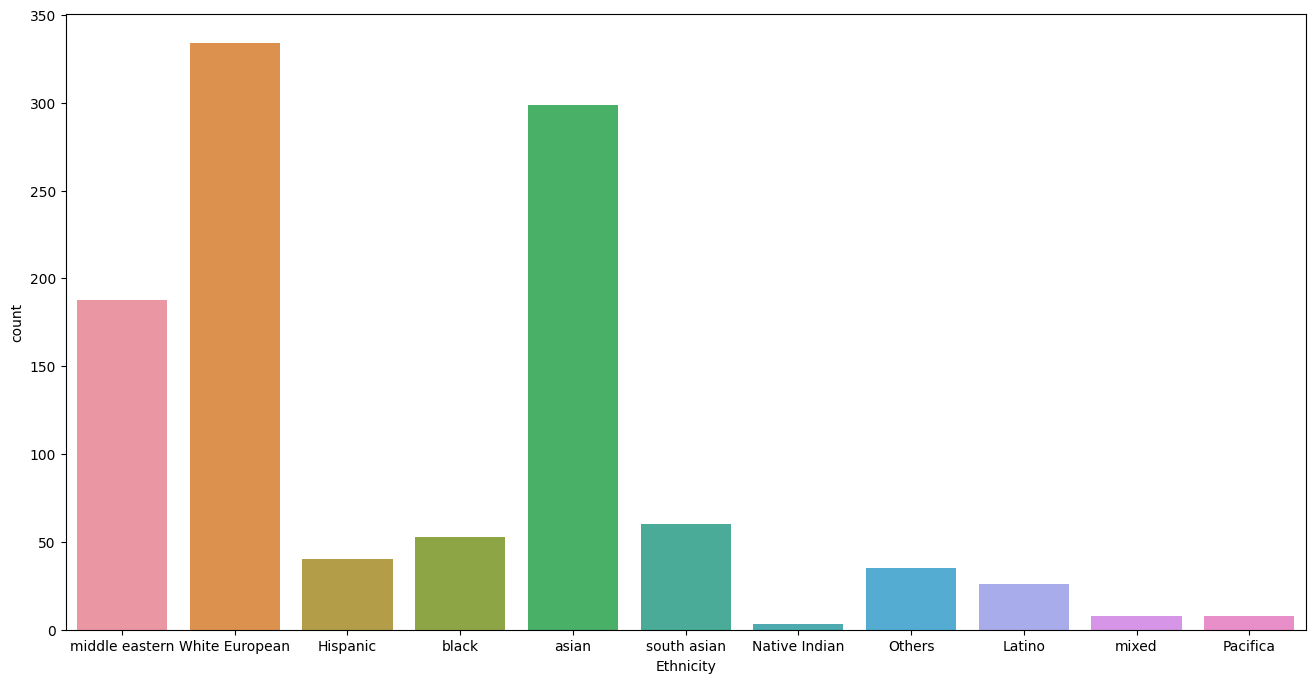

In [ ]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = asd)

In [ ]:
asd.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [ ]:
asd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Qchat-10-Score       1054 non-null   int64 
 12  Sex                  1054 non-null   object
 13  Ethnicity            1054 non-null   object
 14  Jaundice             1054 non-null   object
 15  Family_mem_with_ASD  1054 non-null   object
 16  Class/

In [ ]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    asd[col] = le.fit_transform(asd[col])
asd.dtypes

A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Qchat-10-Score         int64
Sex                    int64
Ethnicity              int64
Jaundice               int64
Family_mem_with_ASD    int64
Class/ASD Traits       int64
dtype: object

In [ ]:
X = asd.drop(['Class/ASD Traits '], axis = 1)
Y = asd['Class/ASD Traits ']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 7)
print('Processed...')

Processed...


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')
logreg.fit(x_train, y_train)
preds = logreg.predict(x_test)
logreg.score(x_train, y_train)

0.9893238434163701

In [ ]:
#classification report
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92        62
           1       0.95      0.99      0.97       149

    accuracy                           0.96       211
   macro avg       0.97      0.93      0.95       211
weighted avg       0.96      0.96      0.96       211



In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        62
           1       0.98      0.96      0.97       149

    accuracy                           0.96       211
   macro avg       0.94      0.96      0.95       211
weighted avg       0.96      0.96      0.96       211



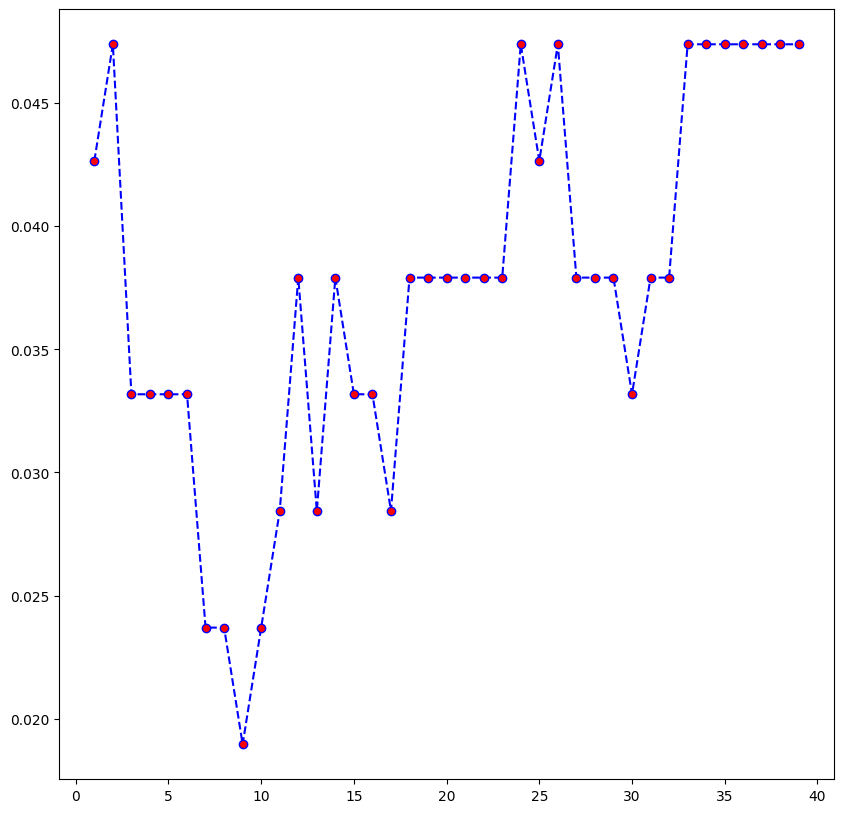

In [ ]:
#to get the optimum n_neighbors
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error_rate.append(np.mean(y_test != pred))
plt.figure(figsize=(10,10))
plt.plot(range(1,40), error_rate, color='blue',linestyle='dashed',marker='o',markerfacecolor='red')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93        62
           1       0.97      0.98      0.97       149

    accuracy                           0.96       211
   macro avg       0.96      0.95      0.95       211
weighted avg       0.96      0.96      0.96       211



In [ ]:
confusion_matrix(y_test, pred)

array([[ 57,   5],
       [  3, 146]])

In [ ]:
import xgboost as xgb

# Define the XGBoost model
model = xgb.XGBClassifier(
    max_depth=3,
    learning_rate=0.1,
    n_estimators=100,
    reg_alpha=0.3,
    reg_lambda=0.2
)

# Train the XGBoost model
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(classification_report(y_test,pred))



              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       149

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [ ]:
confusion_matrix(y_test, pred)

array([[ 62,   0],
       [  0, 149]])

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(ccp_alpha = 0.1, splitter = 'random', random_state = 50)
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        62
           1       0.90      0.91      0.91       149

    accuracy                           0.87       211
   macro avg       0.84      0.84      0.84       211
weighted avg       0.87      0.87      0.87       211



In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pred = rf.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       149

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [ ]:
confusion_matrix(y_test,pred)

array([[ 62,   0],
       [  0, 149]])

In [ ]:
# SVM
from sklearn.svm import SVC
model = SVC(degree=2)
model.fit(x_train, y_train)
pred = model.predict(x_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        62
           1       0.98      0.99      0.99       149

    accuracy                           0.98       211
   macro avg       0.98      0.97      0.98       211
weighted avg       0.98      0.98      0.98       211



In [ ]:
confusion_matrix(y_test,pred)

array([[ 59,   3],
       [  1, 148]])

In [ ]:
models = []
models.append(('Logistic Regression:', LogisticRegression(solver='liblinear')))
models.append(('Naive Bayes        :', GaussianNB()))
models.append(('SVM                :', SVC(degree=2)))
models.append(('KNN                :',KNeighborsClassifier(n_neighbors=1)))
models.append(('Descion Tree      :',DecisionTreeClassifier(ccp_alpha = 0.1, splitter = 'random', random_state = 50)))

for name, model in models:
    model.fit(x_train, y_train)
    pred = model.predict(x_test).astype(int)
    print(name, accuracy_score(y_test, pred))

Logistic Regression: 0.957345971563981
Naive Bayes        : 0.981042654028436
SVM                : 0.981042654028436
KNN                : 0.957345971563981
Descion Tree      : 0.8672985781990521


In [ ]:
import pickle

In [ ]:
with open("Autism.pkl","wb") as file:
  pickle.dump(model, file)

In [ ]:
loaded_model= pickle.load(open("Autism.pkl","rb"))
loaded_model.predict(x_test)
loaded_model.score(x_test,y_test)

0.8672985781990521

In [ ]:
x_test.head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
650,0,0,1,1,0,1,0,0,0,1,24,4,1,6,0,0


In [ ]:
with open("Autism.pkl","rb") as file:
  clf = pickle.load(file)

In [ ]:
prediction = clf.predict([[1,1,0,1,1,0,1,0,0,0,36,5,1,1,0,0]])
if (prediction ==1):
  print("Yes, You have ASD")
else:
  print("No, You dont have ASD")

No, You dont have ASD
